### Imports

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

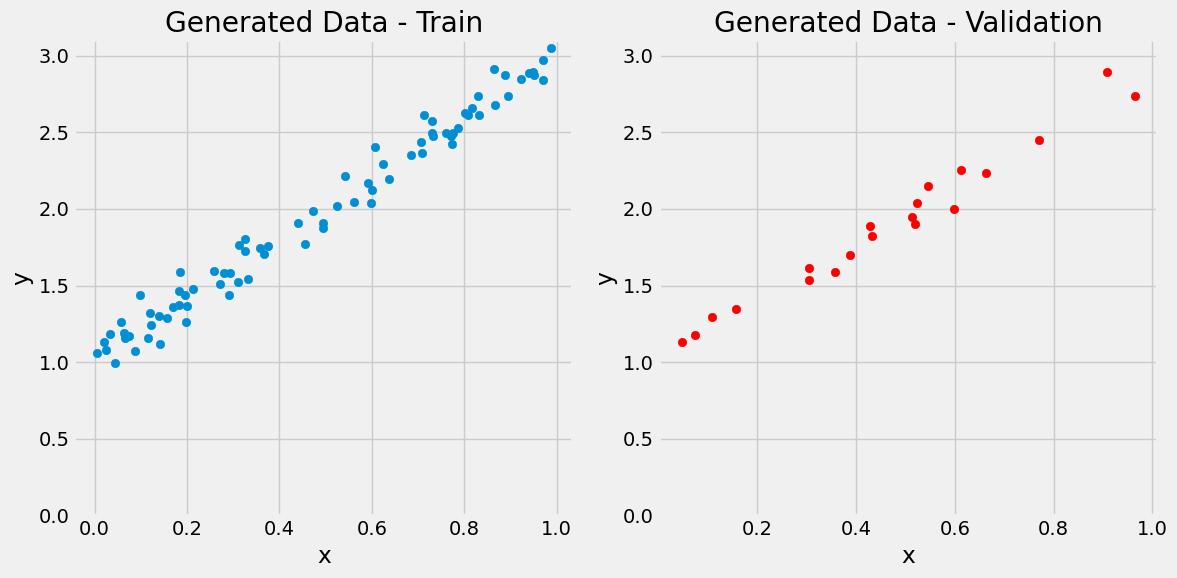

In [5]:
figure1(x_train, y_train, x_val, y_val)

## Step 0 - Random Initialization

In [6]:
# Step 0 - Initialises parameters 'b' and 'w' randomly

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1 - Compute Model's predictions

In [7]:
# Step 1 - Forward pass
yhat = b + w * x_train

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

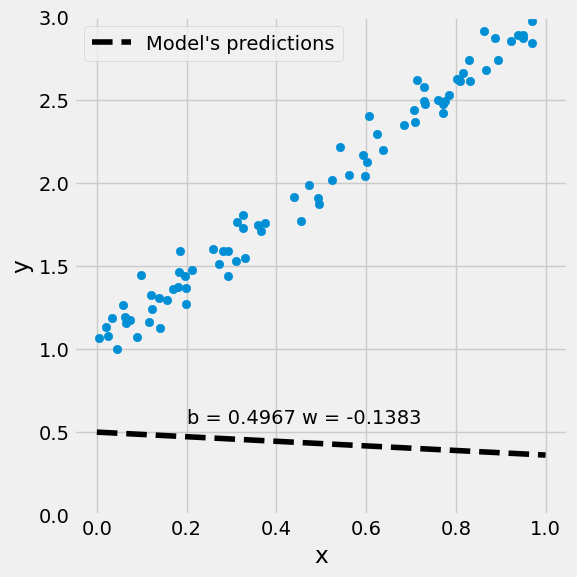

In [8]:
figure2(x_train, y_train, b, w)

## Step 2 - Compute the Loss

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

In [9]:
# Using Batch gradient descent
error = yhat - y_train

# Compute MSE
loss = np.power(error, 2).mean()

print(loss)

2.7421577700550976


## Loss Surface 

In [10]:
# create a range of values for b and w

# split ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)

# create a grid of b and w values similar to coordinates of a plan
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [11]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [12]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [13]:
# check predictions for one data point
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat

array([[-2.77127035, -2.71127035, -2.65127035, ...,  3.10872965,
         3.16872965,  3.22872965],
       [-2.72499413, -2.66499413, -2.60499413, ...,  3.15500587,
         3.21500587,  3.27500587],
       [-2.67871791, -2.61871791, -2.55871791, ...,  3.20128209,
         3.26128209,  3.32128209],
       ...,
       [ 1.76379929,  1.82379929,  1.88379929, ...,  7.64379929,
         7.70379929,  7.76379929],
       [ 1.81007551,  1.87007551,  1.93007551, ...,  7.69007551,
         7.75007551,  7.81007551],
       [ 1.85635173,  1.91635173,  1.97635173, ...,  7.73635173,
         7.79635173,  7.85635173]])

In [14]:
dummy_yhat.shape

(101, 101)

In [15]:
# make predictions for all data points (80 matrices of 101x101)

all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x,
    axis=1, # for every row in x_train - horizontal axis
    arr=x_train
)

all_predictions.shape

(80, 101, 101)

In [16]:
# we need to reshape y_train to match the predictions matrix
# (80, 1) -> (80, 1, 1)
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [17]:
# compute errors
all_errors = all_predictions - all_labels
all_errors.shape

(80, 101, 101)

In [18]:
# calculate losses for each data point
# data point is dimension/axis 0 in the 3d array (80, 101, 101)
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

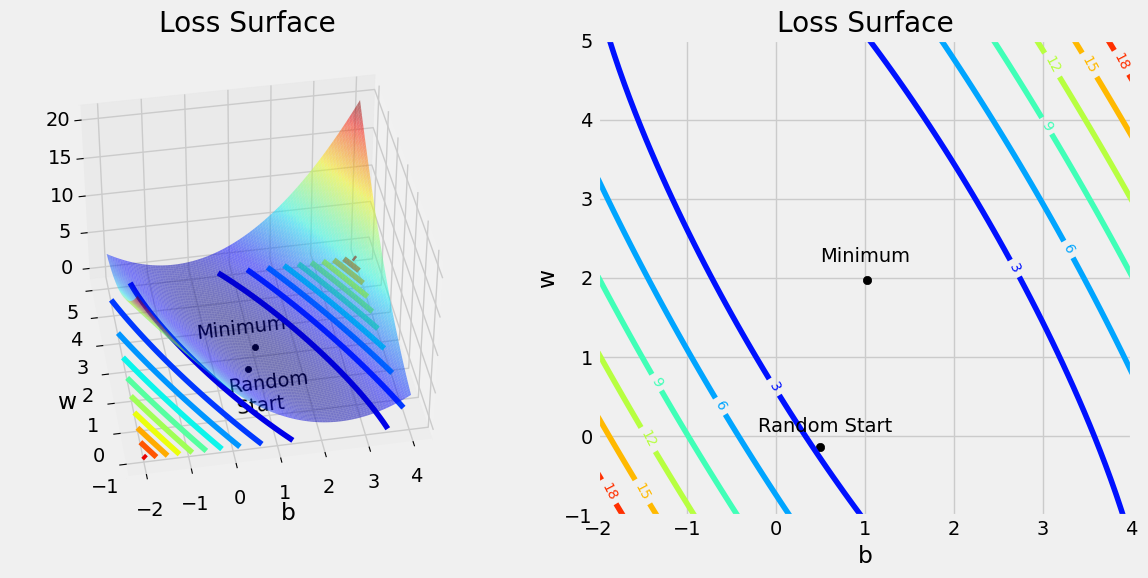

In [19]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

### Cross-Sections

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

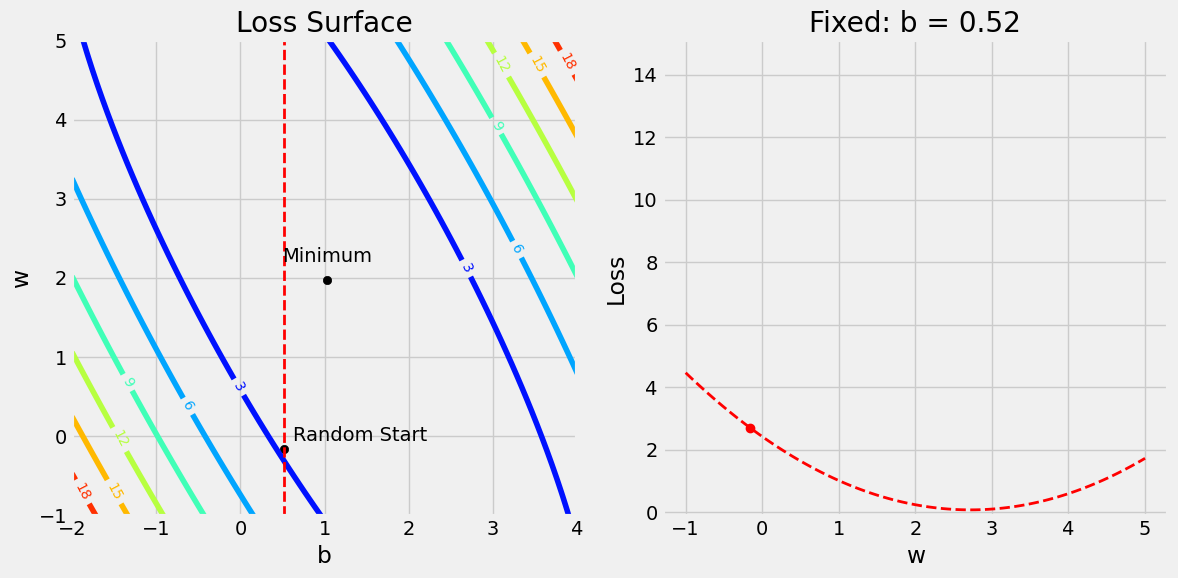

In [20]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

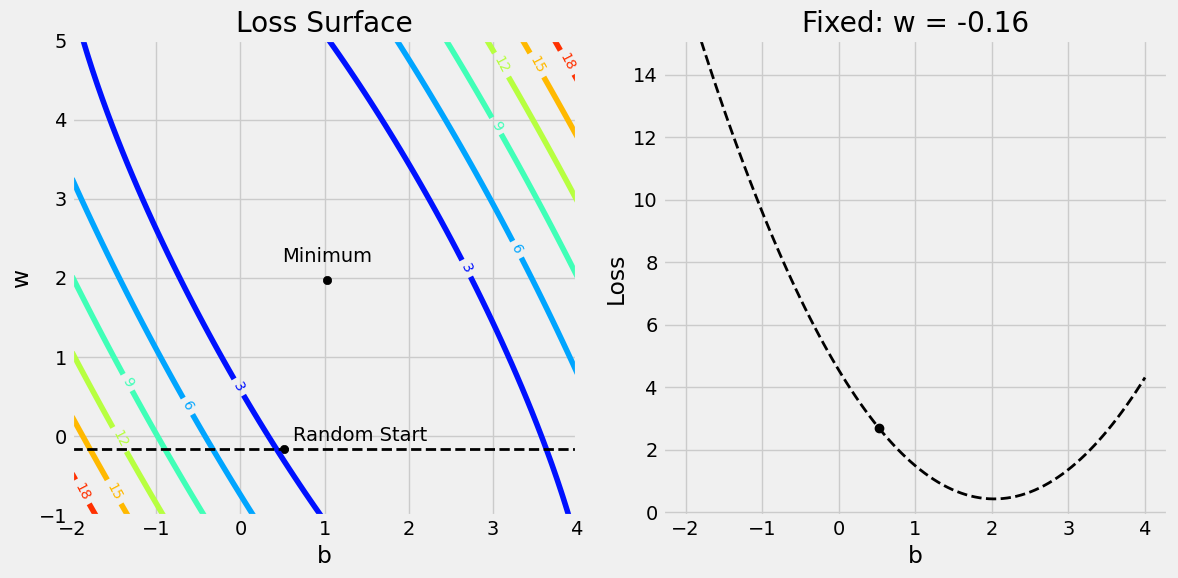

In [21]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

In [22]:
# Step 3 - Computes gradients for both 'b' and 'w'parameters
b_grad = 2 * error.mean() # from Step 2
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

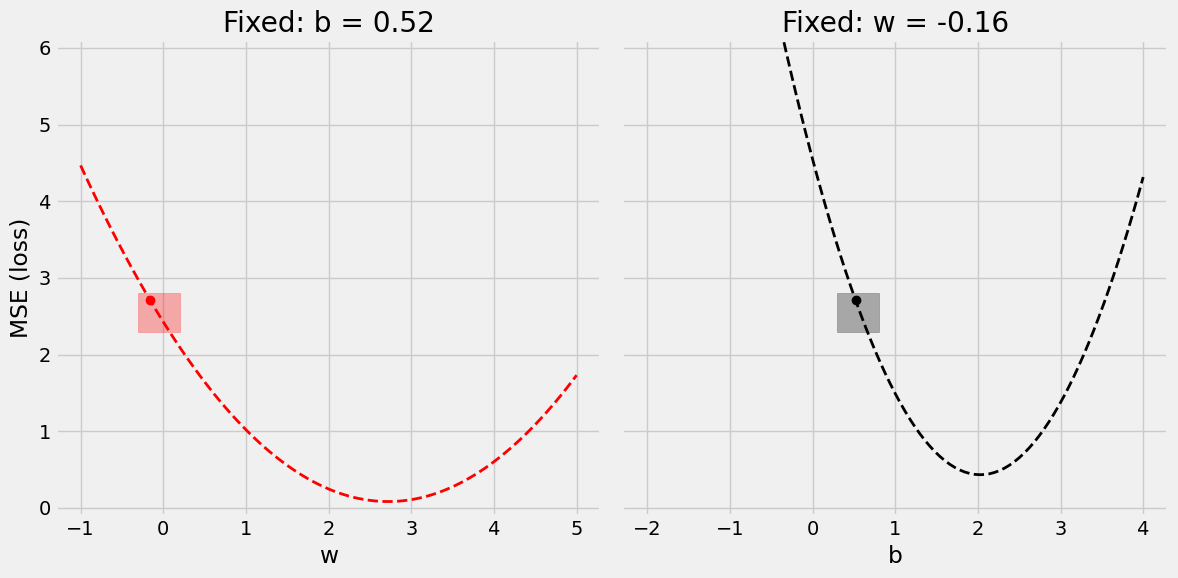

In [23]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

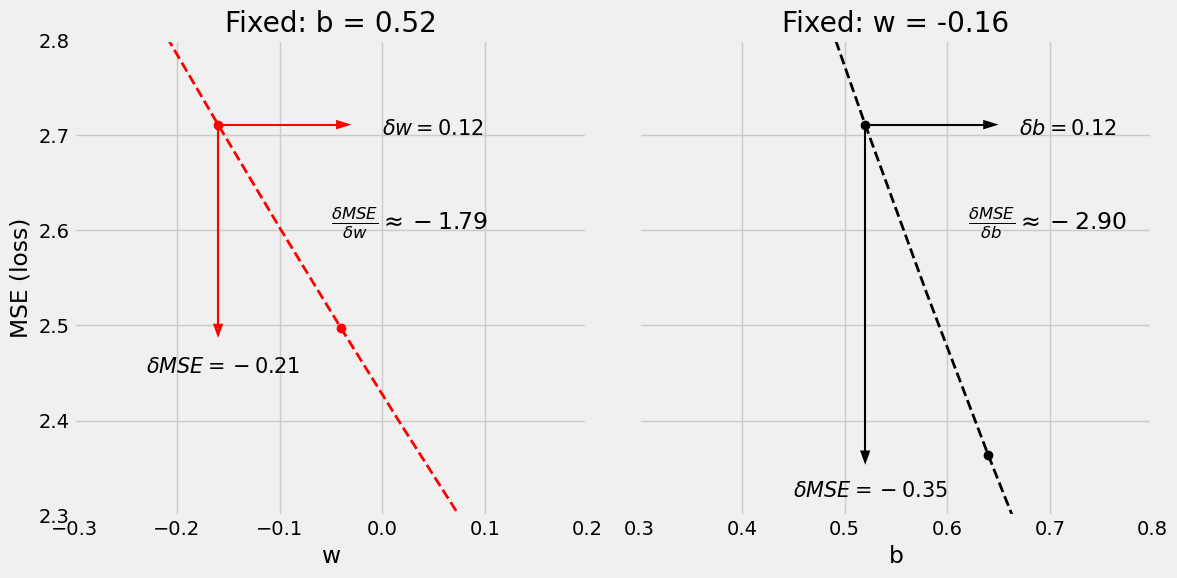

In [24]:
figure8(b, w, bs, ws, all_losses)

### Backpropagation